1. Use the PRS dataset to create a dataframe

In [1]:
pwd

'C:\\Users\\KIIT'

In [2]:
import pandas as pd

df = pd.read_csv("Final.csv")

2. Check the description of the dataframe

In [3]:
df.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


3. Check the shape of the dataframe

In [4]:
df.shape

(1101925, 16)

4. Check the data frame informations

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

5. Check for the Null values in the dataframe

In [6]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

6. Replace all the null values with "NaN"


In [7]:
df.fillna("NaN", inplace=True)

7. Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as "%Y%m%d"


In [8]:
df["ORDER_CREATION_DATE"] = pd.to_datetime(df["ORDER_CREATION_DATE"], format="%Y%m%d")

8. Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"


In [9]:
df["REQUESTED_DELIVERY_DATE"] = pd.to_datetime(df["REQUESTED_DELIVERY_DATE"], format="%Y%m%d")

9. Sanity check - Check how many records are having order date greater than the delivery date

In [10]:
len(df[df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"]])

27142

10. Remove those records where order date is greater than the delivery date 

In [11]:
df = df[~(df["ORDER_CREATION_DATE"] > df["REQUESTED_DELIVERY_DATE"])]

11. Check the number of records where the “ORDER_AMOUNT” field is having “-” in it.


In [12]:
df["ORDER_AMOUNT"].str.contains("-").sum()

32

12. Replace “-” with “” from the “ORDER_AMOUNT” field. 

In [13]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace("-", "")

13. Check the number of records where the “ORDER_AMOUNT” field is having “,” in it..


In [14]:
df["ORDER_AMOUNT"].str.contains(",").sum()

1073406

14. Replace “,” with “.” from the “ORDER_AMOUNT” field.

In [15]:
df["ORDER_AMOUNT"] = df["ORDER_AMOUNT"].str.replace(",", ".")

15. Count the number of records where the order date and the delivery date are same


In [16]:
len(df[df["ORDER_CREATION_DATE"] == df["REQUESTED_DELIVERY_DATE"]])

100437

16. Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”

In [17]:
df["ORDER_CURRENCY"].value_counts()

USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

17. Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column.

In [18]:
def convert_to_usd(currency, amount):
  
  exchange_rates = {
    "USD": 1,
    "EUR": 1.13,
    "GBP": 1.38,
    "INR": 0.014,
    "JPY": 0.0091,
    "CAD": 0.79,
    "AUD": 0.73,
    "CHF": 1.09,
    "CNY": 0.15,
    "SEK": 0.12,
    "NZD": 0.7,
    "MXN": 0.05,
    "SGD": 0.74,
    "HKD": 0.13,
    "NOK": 0.12,
    "KRW": 0.00085,
    "TRY": 0.12,
    "RUB": 0.014,
    "BRL": 0.19,
    "ZAR": 0.069,
  }

  
  if isinstance(amount, str):
    amount = float(amount)

  
  if currency in exchange_rates:
    return amount * exchange_rates[currency]
  else:
    return None


df["amount_in_usd"] = df.apply(lambda row: convert_to_usd(row["ORDER_CURRENCY"], row["ORDER_AMOUNT"]), axis=1)

18. Check for values “0” in the “'amount_in_usd” column. 

In [19]:
len(df[df["amount_in_usd"] == 0])

234933

19. Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE

In [20]:
df["unique_cust_id"] = df["CUSTOMER_NUMBER"].astype(str).str.cat(df["COMPANY_CODE"].astype(str))

# MILESTONE 2

1. Create a Histogram on DISTRIBUTION_CHANNEL

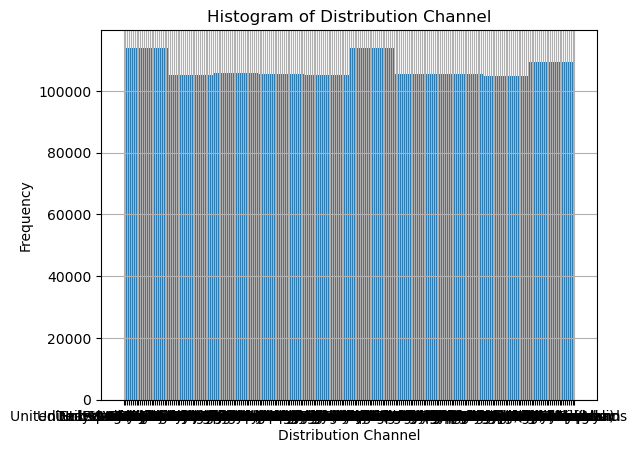

In [21]:
import matplotlib.pyplot as plt

df['DISTRIBUTION_CHANNEL'].hist(bins=10)
plt.xlabel('Distribution Channel')
plt.ylabel('Frequency')
plt.title('Histogram of Distribution Channel')
plt.show()


2. Create a Pie Chart on ORDER_CURRENCY

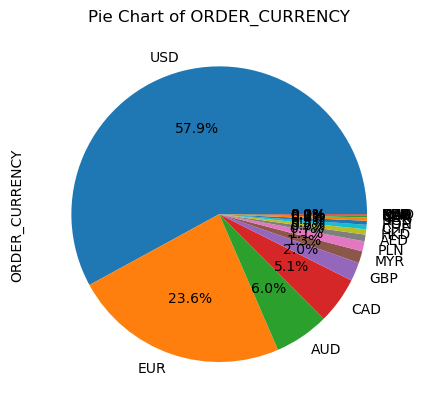

In [22]:
import matplotlib.pyplot as plt

df['ORDER_CURRENCY'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of ORDER_CURRENCY')
plt.show()


3. Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

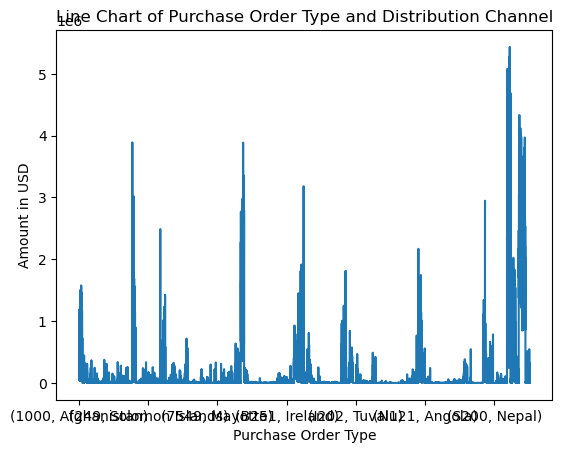

In [23]:
df.groupby(['PURCHASE_ORDER_TYPE', 'DISTRIBUTION_CHANNEL'])['amount_in_usd'].sum().plot(kind='line')
plt.xlabel('Purchase Order Type')
plt.ylabel('Amount in USD')
plt.title('Line Chart of Purchase Order Type and Distribution Channel')
plt.show()

4. Create a line plot on ORDER_CREATION_DATE and amount_in_usd

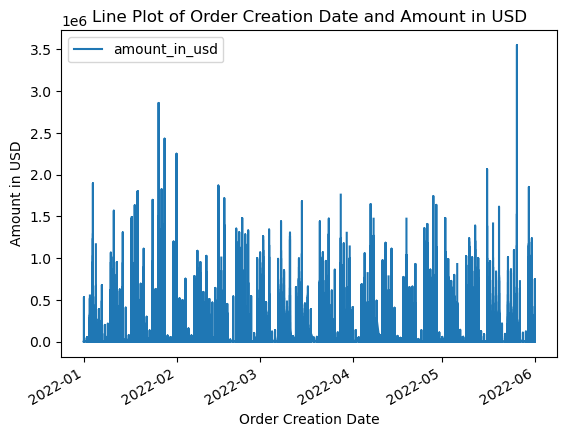

In [24]:
df.plot(x='ORDER_CREATION_DATE', y='amount_in_usd', kind='line')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Line Plot of Order Creation Date and Amount in USD')
plt.show()

5. Create a boxplot on ORDER_AMOUNT	to find out the outliers

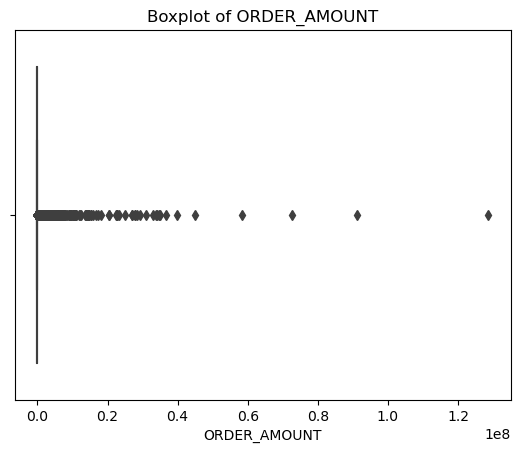

In [25]:
import seaborn as sns     #Used seaborn library as it is much more powerful than matplotlib, hence faster data visualization

df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(float)

sns.boxplot(x='ORDER_AMOUNT', data=df)
plt.xlabel('ORDER_AMOUNT')
plt.title('Boxplot of ORDER_AMOUNT')
plt.show()



6. Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

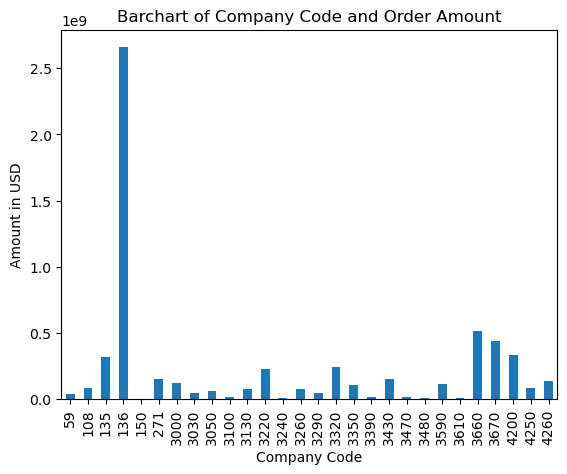

In [26]:
df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum().plot(kind='bar')
plt.xlabel('Company Code')
plt.ylabel('Amount in USD')
plt.title('Barchart of Company Code and Order Amount')
plt.show()

# MILESTONE 3

1. Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.


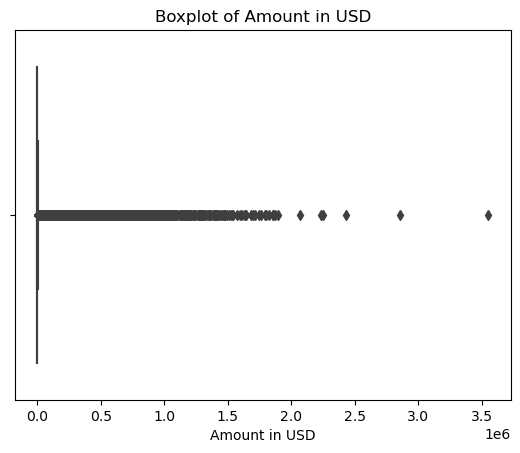

In [27]:
df['amount_in_usd'].describe()

import seaborn as sns 

sns.boxplot(x='amount_in_usd', data=df) 
plt.xlabel('Amount in USD') 
plt.title('Boxplot of Amount in USD') 
plt.show()

Q1 = df['amount_in_usd'].quantile(0.25)    # Calculation of IQR
Q3 = df['amount_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[df['amount_in_usd'] < lower_bound, 'amount_in_usd'] = df['amount_in_usd'].mean()  #Used mean to replace the outliers
df.loc[df['amount_in_usd'] > upper_bound, 'amount_in_usd'] = df['amount_in_usd'].mean()



2. Label encoding or One hot Encoding on all the categorical columns

In [28]:
from sklearn.preprocessing import LabelEncoder

# Selecting the categorical columns in the DataFrame
categorical_cols = ['SALES_ORG', 'DISTRIBUTION_CHANNEL', 'DIVISION', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE', 'CREDIT_CONTROL_AREA', 'SOLD_TO_PARTY', 'ORDER_CURRENCY', 'CREDIT_STATUS', 'CUSTOMER_NUMBER']

label_encoder = LabelEncoder()               # Applying label encoding on each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


3. Log Transformations on continuous columns 

In [29]:
import numpy as np

continuous_cols = ['RELEASED_CREDIT_VALUE', 'ORDER_AMOUNT', 'amount_in_usd']  #Selecting continuous columns in the DataFrame

for col in continuous_cols:                         # Applying log transformations on each continuous column
    if np.issubdtype(df[col].dtype, np.number):
        df[col] = np.log1p(df[col])


4. Try to extract new features by grouping existing columns

In [30]:
# Converting columns to numeric types
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='coerce')
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')
df['RELEASED_CREDIT_VALUE'] = pd.to_numeric(df['RELEASED_CREDIT_VALUE'], errors='coerce')


sales_org_features = df.groupby('SALES_ORG')['ORDER_AMOUNT'].agg(['mean', 'sum', 'count'])
sales_org_features.rename(columns={'mean': 'mean_order_amount', 'sum': 'total_order_amount', 'count': 'order_count'}, inplace=True)


division_features = df.groupby('DIVISION')['amount_in_usd'].agg(['mean', 'sum', 'count'])
division_features.rename(columns={'mean': 'mean_amount_in_usd', 'sum': 'total_amount_in_usd', 'count': 'record_count'}, inplace=True)


purchase_order_features = df.groupby('PURCHASE_ORDER_TYPE')['RELEASED_CREDIT_VALUE'].agg(['mean', 'sum', 'count'])
purchase_order_features.rename(columns={'mean': 'mean_released_credit', 'sum': 'total_released_credit', 'count': 'order_count'}, inplace=True)


df = df.merge(sales_org_features, on='SALES_ORG', how='left')     # Joining the new features with the original DataFrame
df = df.merge(division_features, on='DIVISION', how='left')
df = df.merge(purchase_order_features, on='PURCHASE_ORDER_TYPE', how='left')


5. Create a heatmap to find correlation between the columns

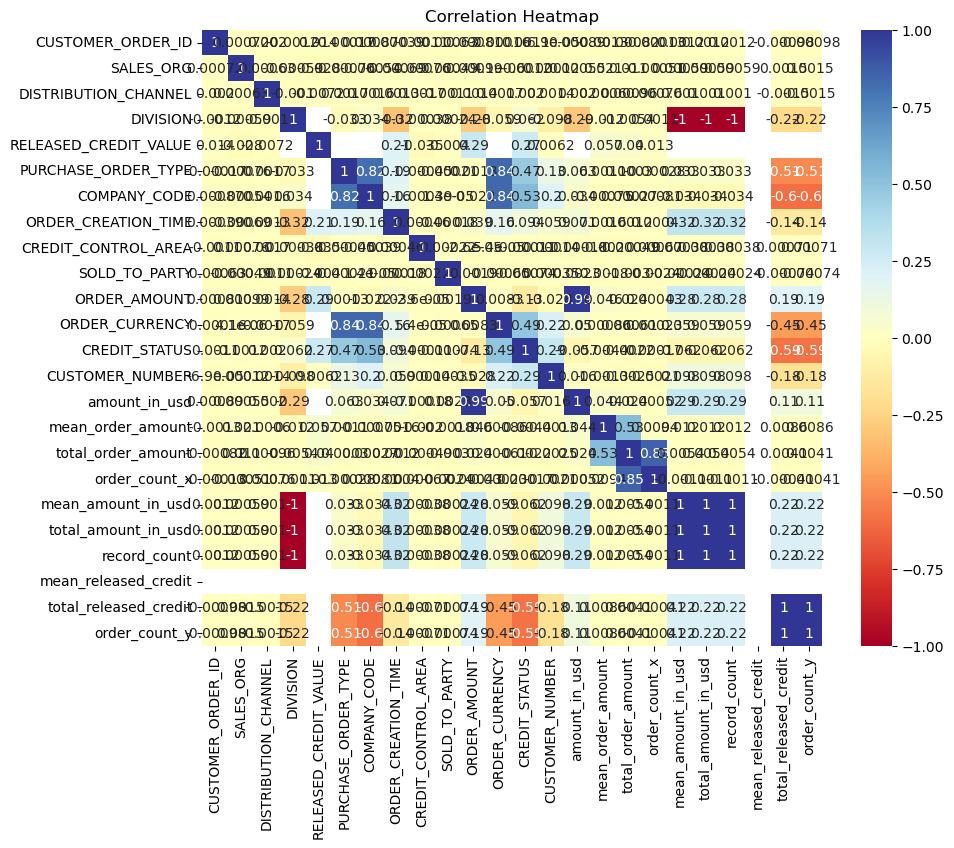

In [31]:
correlation_matrix = df.corr()       # Calculating the correlation matrix

plt.figure(figsize=(10, 8))          # Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Heatmap')
plt.show()


6. Try to identify important or relevant columns for feature extraction


In [32]:
correlation_matrix = df.corr()      # Calculate correlation matrix

# Finding the absolute correlation values with the target variable
correlation_with_target = correlation_matrix['CREDIT_STATUS'].abs().sort_values(ascending=False)

# Selecting the relevant columns based on correlation threshold
relevant_columns = correlation_with_target[correlation_with_target > 0.2].index.tolist()

print("Relevant columns:")
print(relevant_columns)

Relevant columns:
['CREDIT_STATUS', 'total_released_credit', 'order_count_y', 'COMPANY_CODE', 'ORDER_CURRENCY', 'PURCHASE_ORDER_TYPE', 'CUSTOMER_NUMBER', 'RELEASED_CREDIT_VALUE']
